In [ ]:
import numpy as np
# import pandas as pd
# from pandas import DataFrame,Series
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.datasets import fetch_california_housing
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# from scipy import stats
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [ ]:
def load_data():
    california = fetch_california_housing()
    print(california.feature_names)
    print(california.DESCR)
    X = california["data"]
    Y = california["target"]
    names = california["feature_names"]
    print(X, Y, names)
    return X,Y,names


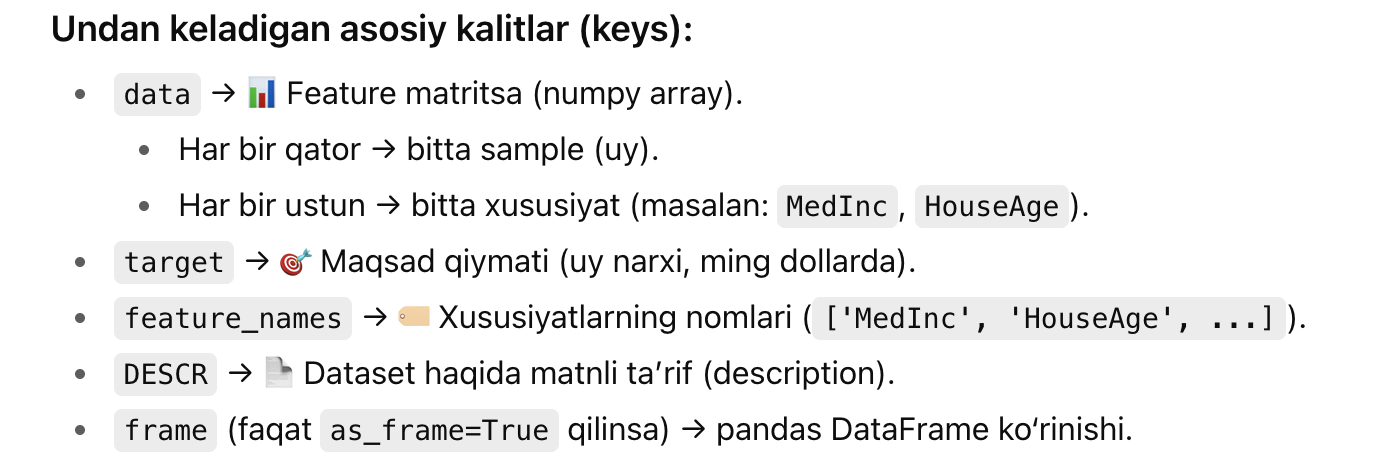

In [ ]:
print(load_data())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousan

In [ ]:
def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    return X_train, X_test, Y_train, Y_test

In [ ]:
X,Y,names = load_data()

In [ ]:
X_train, X_test, Y_train, Y_test = split_data(X,Y)

In [ ]:
def root_mean_square_error(y_pred,y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
    return rmse_train

In [ ]:
print("X_train", X_train, "X_test", X_test)
print("Y_train", Y_train, "Y_test", Y_test)

X_train [[   0.9809       19.            3.18772563 ...    2.62093863
    33.98       -118.28      ]
 [   4.2232       33.            6.18969555 ...    2.37704918
    37.46       -122.23      ]
 [   3.5488       42.            4.82157676 ...    4.33195021
    33.79       -118.26      ]
 ...
 [   2.9344       36.            3.98671727 ...    3.33206831
    34.03       -118.38      ]
 [   5.7192       15.            6.39534884 ...    3.17889088
    37.58       -121.96      ]
 [   2.5755       52.            3.40257649 ...    2.10869565
    37.77       -122.42      ]] X_test [[   1.6812       25.            4.19220056 ...    3.87743733
    36.06       -119.01      ]
 [   2.5313       30.            5.03938356 ...    2.67979452
    35.14       -119.46      ]
 [   3.4801       52.            3.97715472 ...    1.36033229
    37.8        -122.44      ]
 ...
 [   3.8355       15.            6.41975309 ...    3.60219479
    38.71       -121.4       ]
 [   4.3958       10.            6.15450644 

In [ ]:
def plot_real_vs_predicted(y_pred,y_test):
    plt.plot(y_pred,y_test,'ro')
    plt.plot([0,50],[0,50], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.show()
    return plt

Linear model:  0.779 * AveBedrms + 0.445 * MedInc + -0.434 * Longitude + -0.419 * Latitude + -0.122 * AveRooms + 0.01 * HouseAge + -0.003 * AveOccup + -0.0 * Population
Root Mean Square Error: 0.7327814505957726


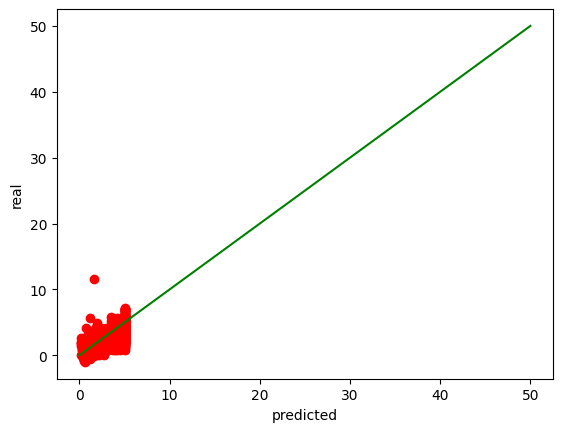

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

print ("Linear model: ", pretty_print_linear(linreg.coef_, names, sort = True))

# Predict the values using the model
Y_lin_predict = linreg.predict(X_test)

# Print the root mean square error
print ("Root Mean Square Error: {}".format(root_mean_square_error(Y_lin_predict,Y_test)))
plot_real_vs_predicted(Y_test,Y_lin_predict)